In [289]:
import os
print(os.getcwd())  # покаже поточну робочу директорію


C:\Users\Elena


In [290]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [291]:
# завантажую файлирезультатів опитування та схеми опитування

In [292]:
df = pd.read_csv("survey_results_public.csv")
schema = pd.read_csv("survey_results_schema.csv")

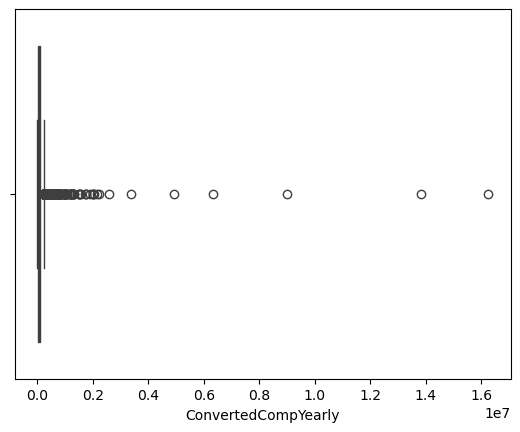

In [293]:
sns.boxplot(data=df, x='ConvertedCompYearly')   # Боксплот покаже викиди
plt.show()

In [294]:
# Фільтруємо по країні Gabon
gabon_salaries = df[df['Country'] == 'Gabon']

# Дивимося на зарплатню
print(gabon_salaries['ConvertedCompYearly'])

# Додатково: описова статистика
print(gabon_salaries['ConvertedCompYearly'].describe())
#gabon_salaries[['Country', 'Employment', 'EdLevel', 'YearsCodePro', 'ConvertedCompYearly']]


2187     2000000.0
9493           NaN
27000          NaN
27646          NaN
Name: ConvertedCompYearly, dtype: float64
count          1.0
mean     2000000.0
std            NaN
min      2000000.0
25%      2000000.0
50%      2000000.0
75%      2000000.0
max      2000000.0
Name: ConvertedCompYearly, dtype: float64


In [299]:
# Визначаємо розмір DataFrame
df.shape

(65437, 114)

In [296]:
# То ж відповідь на перше запитання: 1. Скільки респондентів пройшли опитування? = 65 437 респондентів

In [298]:
# досліджую як відрізняються колонки опитування та колонки схеми

In [125]:
questions_from_survey = df.columns
questions_from_schema = schema.qname
print(questions_from_schema)
print(questions_from_survey)

0          MainBranch
1                 Age
2          Employment
3          RemoteWork
4               Check
           ...       
82     JobSatPoints_7
83     JobSatPoints_8
84     JobSatPoints_9
85    JobSatPoints_10
86    JobSatPoints_11
Name: qname, Length: 87, dtype: object
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


In [126]:
# створюю змінну, в яку входять тільки ті колонки, які присутні як в опитування, так і в схемі

In [127]:
both = set(questions_from_schema) & set(questions_from_survey)
print (both)

{'Knowledge_7', 'Frustration', 'YearsCode', 'MainBranch', 'LearnCodeOnline', 'EdLevel', 'SurveyLength', 'AIChallenges', 'Currency', 'AIAcc', 'ProfessionalCloud', 'TBranch', 'NEWSOSites', 'LearnCode', 'AIBen', 'JobSatPoints_8', 'ProfessionalTech', 'Age', 'WorkExp', 'AIComplex', 'Country', 'YearsCodePro', 'Knowledge_3', 'SOPartFreq', 'JobSatPoints_4', 'CompTotal', 'AISent', 'DevType', 'AIEthics', 'Knowledge_2', 'JobSatPoints_9', 'BuyNewTool', 'TimeAnswering', 'Check', 'RemoteWork', 'SOHow', 'Frequency_1', 'JobSatPoints_6', 'Frequency_2', 'JobSatPoints_7', 'ProfessionalQuestion', 'AISelect', 'Knowledge_8', 'PurchaseInfluence', 'Employment', 'JobSatPoints_1', 'Industry', 'TechDoc', 'BuildvsBuy', 'Knowledge_1', 'Knowledge_5', 'JobSat', 'OrgSize', 'AIThreat', 'JobSatPoints_11', 'TimeSearching', 'Knowledge_6', 'SOVisitFreq', 'TechEndorse', 'SOAccount', 'SurveyEase', 'Knowledge_9', 'Knowledge_4', 'CodingActivities', 'JobSatPoints_10', 'SOComm', 'Frequency_3', 'JobSatPoints_5', 'ICorPM'}


In [129]:
# рахую всі колонки (які присуьні в обох файлах), в яких відсутні NaN, отримую кліксть рядків, які на 100% заповнені респондентами

In [130]:
df_cleaned = df.dropna(subset = both)
df_cleaned_num = df_cleaned.shape[0]
print(df_cleaned_num)

6306


In [131]:
# Знаходжу які колонки є в Опитуванні, але немає в Сх

In [132]:
survey_only = set(questions_from_survey).difference(set(questions_from_schema))
print(survey_only)

{'DatabaseAdmired', 'OfficeStackAsyncHaveWorkedWith', 'AISearchDevWantToWorkWith', 'NEWCollabToolsAdmired', 'LanguageAdmired', 'ToolsTechWantToWorkWith', 'ConvertedCompYearly', 'EmbeddedHaveWorkedWith', 'MiscTechAdmired', 'EmbeddedAdmired', 'LanguageWantToWorkWith', 'ToolsTechHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'DatabaseHaveWorkedWith', 'PlatformWantToWorkWith', 'AINextLess integrated', 'PlatformAdmired', 'OfficeStackAsyncAdmired', 'AINextMore integrated', 'PlatformHaveWorkedWith', 'AINextMuch less integrated', 'OfficeStackSyncAdmired', 'EmbeddedWantToWorkWith', 'NEWCollabToolsWantToWorkWith', 'OfficeStackSyncHaveWorkedWith', 'AIToolCurrently Using', 'AINextMuch more integrated', 'AINextNo change', 'LanguageHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'MiscTechWantToWorkWith', 'ToolsTechAdmired', 'WebframeAdmired', 'ResponseId', 'DatabaseWantToWorkWith', 'AISearchDevAdmired', 'MiscTechHaveWorkedWith', 'OpSysProfessional use', 'AISearchDevHaveWorkedWith', 'WebframeHa

In [133]:
# Аналізую опитуівальник, більшість питань, які мають вибір між двома колонками, 
# де Респондент має обрати лише обну з них, мають в назві або "Have", або "Want", то ж сформуємо ці пари:

In [134]:
df.loc[:, df.columns.str.contains('Have')].head(2)

,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,EmbeddedHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OfficeStackAsyncHaveWorkedWith,OfficeStackSyncHaveWorkedWith,AISearchDevHaveWorkedWith
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,NaN,Microsoft Teams;Slack,NaN


In [135]:
df.loc[:, df.columns.str.contains('Want')].head(2)

,LanguageWantToWorkWith,DatabaseWantToWorkWith,PlatformWantToWorkWith,WebframeWantToWorkWith,EmbeddedWantToWorkWith,MiscTechWantToWorkWith,ToolsTechWantToWorkWith,NEWCollabToolsWantToWorkWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncWantToWorkWith,AISearchDevWantToWorkWith
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Htmx;Node.js;React;Remix,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,NaN,Slack,NaN


In [136]:
# Всього бачимо 11 пар:
# LanguageHaveWorkedWith           та     LanguageWantToWorkWith          - b1
# DatabaseHaveWorkedWith           та     DatabaseWantToWorkWith          - b2
# PlatformHaveWorkedWith           та     PlatformWantToWorkWith          - b3
# WebframeHaveWorkedWith           та     WebframeWantToWorkWith          - b4
# EmbeddedHaveWorkedWith           та     EmbeddedWantToWorkWith          - b5
# MiscTechHaveWorkedWith           та     MiscTechWantToWorkWith          - b6
# ToolsTechHaveWorkedWith          та     ToolsTechWantToWorkWith         - b7
# NEWCollabToolsHaveWorkedWith     та     NEWCollabToolsWantToWorkWith    - b8
# OfficeStackAsyncHaveWorkedWith   та     OfficeStackAsyncWantToWorkWith  - b9
# OfficeStackSyncHaveWorkedWith    та     OfficeStackSyncWantToWorkWith   - b10
# AISearchDevHaveWorkedWith        та     AISearchDevWantToWorkWith       - b11

In [137]:
# Об'єднуємо два стовбці LanguageHaveWorkedWith та LanguageWantToWorkWith, 
# щоб надалі в загальному стовбці знайти рядки з NaN (там де в обох немає відповіді), присвоюємо змінну both1

In [138]:
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].astype('string')
df['LanguageWantToWorkWith'] = df['LanguageWantToWorkWith'].astype('string')

In [245]:
both1=df['LanguageHaveWorkedWith'] + df['LanguageWantToWorkWith']
# print(both1)
# print(df.columns)

In [246]:
# Очищуємо об'єднаний рядок (both1) від рядків зі значенням Nan, та рахуємо кількість респондентів, хто відповів на питання

In [249]:
df_cleaned_1 = df[~both1.isna()]
print(df_cleaned_1.shape[0])

55752


In [267]:
print('LanguageHaveWorkedWith' in df.columns)
print('LanguageWantToWorkWith' in df.columns)

True
True


In [143]:
# Будуємо діаграму ТОП-10 мов, які користувачі вже викорустовують чи планують (хочуть) використати в майбутньому, для цього:

In [311]:
# Створюємо безпечну копію всього датафрейму
df_cleaned_1 = df.copy()

# Заповнюємо NaN у колонках з мовами програмування
df_temp_l = df_cleaned_1[['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']].fillna('')

# Об’єднуємо значення в один рядок
combined_strings_l = df_temp_l.apply(lambda x: x['LanguageHaveWorkedWith'] + ';' + x['LanguageWantToWorkWith'], axis=1)

# Розбиваємо на список, прибираємо пусті значення та дублікати
cleaned_lists_l = combined_strings_l.apply(lambda x: list(set(filter(None, x.split(';')))))

# Перетворюємо назад у рядки та додаємо до основного датафрейму
df_cleaned_1.loc[:, 'all_language'] = cleaned_lists_l.apply(lambda x: ';'.join(x))

# Перевіряємо перші 10 рядків повного датафрейму
df_cleaned_1.head(3)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,all_language
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Go;TypeScript;JavaScript;Java;HTML/CSS;Python;...
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,C#


In [313]:
print('LanguageHaveWorkedWith' in df.columns)
print('LanguageWantToWorkWith' in df.columns)

True
True


In [315]:
# Зберігаємо CSV з роздільником крапка з комою (;) замість коми (,)
df_cleaned_1.to_csv("df_cleaned_1_fixed.csv", index=False, sep=';')
pd.read_csv("df_cleaned_1_fixed.csv", sep=';').head(3)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,all_language
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Go;TypeScript;JavaScript;Java;HTML/CSS;Python;...
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,C#


In [317]:
# Після підготування данних, переходимо безпосередньо до створення кругової гістограми ТОП-10 мов

# Розбиваємо кожен рядок за ; і об’єднуємо все в один список
all_l_list = df_cleaned_1['all_language'].dropna().str.split(';').sum()

# Рахуємо кількість згадувань кожної бази даних
l_counts = Counter(all_l_list)

# Беремо топ-10
top_10_l = dict(l_counts.most_common(10))

# Обчислюємо суму всіх інших
other_count_l = sum(l_counts.values()) - sum(top_10_l.values())

# Додаємо "Other"
top_10_l['Other'] = other_count_l

In [318]:
# Готуємо паралельно файл csv для подальшого використання в Tableau:

# Перетворюємо словник у датафрейм
df_lang = pd.DataFrame(top_10_l.items(), columns=['Language', 'Count'])

# Додаємо відсоток
df_lang['Percentage'] = (df_lang['Count'] / df_lang['Count'].sum()) * 100

# Зберігаємо
df_lang.to_csv('language_popularity.csv', index=False)


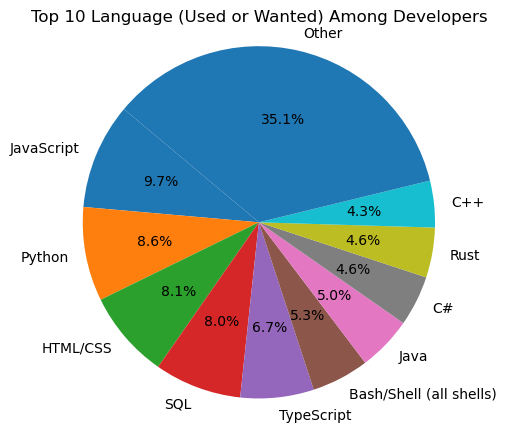

In [320]:
# Створюємо кругову діаграму
plt.figure(figsize=(5, 5))
plt.pie(top_10_l.values(), labels=top_10_l.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Language (Used or Wanted) Among Developers')
plt.axis('equal')  # Робить коло круглим
plt.show()

In [324]:
df_cleaned_1.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'all_language'],
      dtype='object', length=115)

In [333]:
# Робимо аналогічні дії для пари DatabaseHaveWorkedWith та DatabaseWantToWorkWith

In [335]:
df['DatabaseHaveWorkedWith'] = df['DatabaseHaveWorkedWith'].astype('string')
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].astype('string')
both2=df['DatabaseHaveWorkedWith'] + df['DatabaseWantToWorkWith']
# print(both2)
# print(df.columns)
df_cleaned_2 = df[~both2.isna()]
print(df_cleaned_2.shape[0])

42558


In [338]:
# Будуємо діаграму ТОП-10 Database, які користувачі вже викорустовують чи планують (хочуть) використати в майбутньому, для цього:

In [341]:
# Створюємо копію потрібних колонок і замінюємо NaN на порожній рядок
df_temp = df_cleaned_2[['DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith']].fillna('')

# Об’єднуємо значення з обох колонок в один рядок, розділений крапкою з комою
combined_strings = df_temp.apply(lambda x: x['DatabaseHaveWorkedWith'] + ';' + x['DatabaseWantToWorkWith'], axis=1)

# Розбиваємо на список, прибираємо порожні значення та дублікати
cleaned_lists = combined_strings.apply(lambda x: list(set(filter(None, x.split(';')))))

# Перетворюємо назад у рядки та записуємо в нову колонку датафрейму
df_cleaned_2.loc[:, 'all_databases'] = cleaned_lists.apply(lambda x: ';'.join(x))

df_cleaned_2[['DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'all_databases']].head(10)

,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,all_databases
1,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL;MongoDB;Dynamodb
2,Firebase Realtime Database,Firebase Realtime Database,Firebase Realtime Database
3,MongoDB;MySQL;PostgreSQL;SQLite,MongoDB;MySQL;PostgreSQL,PostgreSQL;MySQL;MongoDB;SQLite
4,PostgreSQL;SQLite,PostgreSQL;SQLite,PostgreSQL;SQLite
5,Cloud Firestore,Cloud Firestore,Cloud Firestore
7,Supabase,Supabase,Supabase
9,MongoDB;MySQL;PostgreSQL;Redis,MongoDB;MySQL;PostgreSQL;Redis,PostgreSQL;MySQL;MongoDB;Redis
10,Elasticsearch;MongoDB;PostgreSQL;SQLite,Elasticsearch;MongoDB;PostgreSQL;SQLite,PostgreSQL;SQLite;MongoDB;Elasticsearch
11,Microsoft Access;Microsoft SQL Server;PostgreS...,Microsoft SQL Server;PostgreSQL;SQLite,PostgreSQL;SQLite;Microsoft Access;Microsoft S...
12,MySQL,MySQL,MySQL


In [345]:
# Після підготування данних, переходимо безпосередньо до створення кругової гістограми ТОП-10

# Розбиваємо кожен рядок за ; і об’єднуємо все в один список
all_db_list = df_cleaned_2['all_databases'].dropna().str.split(';').sum()

# Рахуємо кількість згадувань кожної бази даних
db_counts = Counter(all_db_list)

# Беремо топ-10
top_10 = dict(db_counts.most_common(10))

# Обчислюємо суму всіх інших
other_count = sum(db_counts.values()) - sum(top_10.values())

# Додаємо "Other"
top_10['Other'] = other_count


In [346]:
# Готуємо паралельно файл csv для подальшого використання в Tableau:

# Перетворюємо словник у датафрейм
df_db = pd.DataFrame(top_10.items(), columns=['Database', 'Count_db'])

# Додаємо відсоток
df_db['Percentage_db'] = (df_db['Count_db'] / df_db['Count_db'].sum()) * 100

# Зберігаємо
df_db.to_csv('db_popularity.csv', index=False)


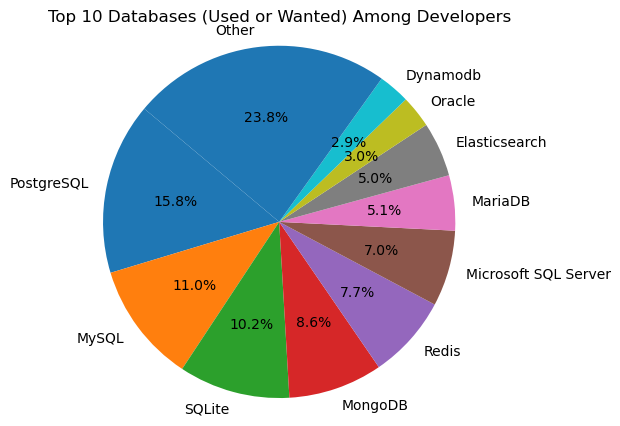

In [347]:

# Створюємо кругову діаграму
plt.figure(figsize=(5, 5))
plt.pie(top_10.values(), labels=top_10.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Databases (Used or Wanted) Among Developers')
plt.axis('equal')  # Робить коло круглим
plt.show()


In [237]:
df_cleaned_2.to_csv("df_cleaned_2.csv", index=False)

In [239]:
# Робимо аналогічні дії для пари PlatformHaveWorkedWith   та    PlatformWantToWorkWith

In [36]:
df['PlatformHaveWorkedWith'] = df['PlatformHaveWorkedWith'].astype('string')
df['PlatformWantToWorkWith'] = df['PlatformWantToWorkWith'].astype('string')
both3=df['PlatformHaveWorkedWith'] + df['PlatformWantToWorkWith']
df_cleaned_3 = df[~both3.isna()]
print(df_cleaned_3.shape[0])

34532


In [37]:
# Робимо аналогічні дії для пари WebframeHaveWorkedWith    та   WebframeWantToWorkWith

In [38]:
df['WebframeHaveWorkedWith'] = df['WebframeHaveWorkedWith'].astype('string')
df['WebframeWantToWorkWith'] = df['WebframeWantToWorkWith'].astype('string')
both4=df['WebframeHaveWorkedWith'] + df['WebframeWantToWorkWith']
df_cleaned_4 = df[~both4.isna()]
print(df_cleaned_4.shape[0])

38535


In [39]:
# Робимо аналогічні дії для пари EmbeddedHaveWorkedWith     та     EmbeddedWantToWorkWith 

In [40]:
df['EmbeddedHaveWorkedWith'] = df['EmbeddedHaveWorkedWith'].astype('string')
df['EmbeddedWantToWorkWith'] = df['EmbeddedWantToWorkWith'].astype('string')
both5=df['EmbeddedHaveWorkedWith'] + df['EmbeddedWantToWorkWith']
df_cleaned_5 = df[~both5.isna()]
print(df_cleaned_5.shape[0])

17600


In [41]:
# Робимо аналогічні дії для пари MiscTechHaveWorkedWith    та     MiscTechWantToWorkWith

In [42]:
df['MiscTechHaveWorkedWith'] = df['MiscTechHaveWorkedWith'].astype('string')
df['MiscTechWantToWorkWith'] = df['MiscTechWantToWorkWith'].astype('string')
both6=df['MiscTechHaveWorkedWith'] + df['MiscTechWantToWorkWith']
df_cleaned_6 = df[~both6.isna()]
print(df_cleaned_6.shape[0])

32964


In [43]:
# Робимо аналогічні дії для пари ToolsTechHaveWorkedWith    та   ToolsTechWantToWorkWith

In [44]:
df['ToolsTechHaveWorkedWith'] = df['ToolsTechHaveWorkedWith'].astype('string')
df['ToolsTechWantToWorkWith'] = df['ToolsTechWantToWorkWith'].astype('string')
both7=df['ToolsTechHaveWorkedWith'] + df['ToolsTechWantToWorkWith']
df_cleaned_7 = df[~both7.isna()]
print(df_cleaned_7.shape[0])

46084


In [45]:
# Робимо аналогічні дії для пари NEWCollabToolsHaveWorkedWith    та    NEWCollabToolsWantToWorkWith

In [46]:
df['NEWCollabToolsHaveWorkedWith'] = df['NEWCollabToolsHaveWorkedWith'].astype('string')
df['NEWCollabToolsWantToWorkWith'] = df['NEWCollabToolsWantToWorkWith'].astype('string')
both8=df['NEWCollabToolsHaveWorkedWith'] + df['NEWCollabToolsWantToWorkWith']
df_cleaned_8 = df[~both8.isna()]
print(df_cleaned_8.shape[0])

52087


In [47]:
# Робимо аналогічні дії для пари OfficeStackAsyncHaveWorkedWith   та   OfficeStackAsyncWantToWorkWith

In [48]:
df['OfficeStackAsyncHaveWorkedWith'] = df['OfficeStackAsyncHaveWorkedWith'].astype('string')
df['OfficeStackAsyncWantToWorkWith'] = df['OfficeStackAsyncWantToWorkWith'].astype('string')
both9=df['OfficeStackAsyncHaveWorkedWith'] + df['OfficeStackAsyncWantToWorkWith']
df_cleaned_9 = df[~both9.isna()]
print(df_cleaned_9.shape[0])

38966


In [49]:
# Робимо аналогічні дії для пари OfficeStackSyncHaveWorkedWith    та     OfficeStackSyncWantToWorkWith

In [50]:
df['OfficeStackSyncHaveWorkedWith'] = df['OfficeStackSyncHaveWorkedWith'].astype('string')
df['OfficeStackSyncWantToWorkWith'] = df['OfficeStackSyncWantToWorkWith'].astype('string')
both10=df['OfficeStackSyncHaveWorkedWith'] + df['OfficeStackSyncWantToWorkWith']
df_cleaned_10 = df[~both10.isna()]
print(df_cleaned_10.shape[0])

46711


In [51]:
# Робимо аналогічні дії для пари AISearchDevHaveWorkedWith     та     AISearchDevWantToWorkWith

In [52]:
df['AISearchDevHaveWorkedWith'] = df['AISearchDevHaveWorkedWith'].astype('string')
df['AISearchDevWantToWorkWith'] = df['AISearchDevWantToWorkWith'].astype('string')
both11=df['AISearchDevHaveWorkedWith'] + df['AISearchDevWantToWorkWith']
df_cleaned_11 = df[~both11.isna()]
print(df_cleaned_11.shape[0])

36701


In [53]:
# Тепер обєднаємо всі 11 DataFrame плюс наш перший df_cleaned (всього 12), та приберемо дублікати 

In [54]:
df_list = [df_cleaned_1, df_cleaned_2, df_cleaned_3, df_cleaned_4, df_cleaned_5, 
           df_cleaned_6, df_cleaned_7, df_cleaned_8, df_cleaned_9, df_cleaned_10, df_cleaned_11, df_cleaned]

# Об'єдную всі датафрейми в один
df_combined = pd.concat(df_list, ignore_index=True)

# Видаляю дублікати за унікальним ID респондента
df_unique_respondents = df_combined.drop_duplicates(subset='ResponseId') 

#кількість унікальних респондентів, які відповіли на всі питання
df_unique_respondents_num = df_unique_respondents.shape[0] 

In [55]:
# ОТРИМАЄМО кількість унікальних респондентів, які відповіли на всі питання Опитувальника
print(df_unique_respondents_num)

57074


In [56]:
df_unique_respondents.to_csv("df_unique_respondents.csv", index=False)

In [57]:
# То ж маю відповідь на запитання
# 2. Скільки респондентів відповіли на всі запитання? = 58 090 респондентів


In [58]:
# 3. Які значення мір центральної тенденції для досвіду (WorkExp) респондентів?

In [59]:
mean = df.WorkExp.mean()
mode = df.WorkExp.mode().values[0]  # Отримуємо чисте значення
median = df.WorkExp.median()

print(f"В результаті розрахунків було з'ясовано, що значення мір центральної тенденції для досвіду (WorkExp) респондентів наступні:\n"
      f"- Середнє: {mean:.2f}\n"
      f"- Мода: {mode:.2f}\n"
      f"- Медіана: {median:.2f}")

В результаті розрахунків було з'ясовано, що значення мір центральної тенденції для досвіду (WorkExp) респондентів наступні:
- Середнє: 11.47
- Мода: 3.00
- Медіана: 9.00


In [60]:
# 4. Скільки респондентів працює віддалено?

In [61]:
remote = df[df.RemoteWork=='Remote'].shape[0]
print(f"{remote} респондентів працюють віддалено")

20831 респондентів працюють віддалено


In [62]:
# 5. Який відсоток респондентів програмує на Python?

In [63]:
mask = df.LanguageHaveWorkedWith.str.lower().str.contains('python', na = False)
percentage = (df.loc[mask].shape[0])/(len(df.ResponseId.unique()))*100
print(f"Відсоток респондентів, які працювали з Python: {percentage:.2f}%")

Відсоток респондентів, які працювали з Python: 47.06%


In [64]:
# 6. Скільки респондентів навчалося програмувати за допомогою онлайн курсів?

In [65]:
df.LearnCode[mask]
online = df.loc[mask].shape[0]
print(f" {online} респондентів, навчалося програмувати за допомогою онлайн курсів.")

 30795 респондентів, навчалося програмувати за допомогою онлайн курсів.


In [66]:
# 7. Серед респондентів що програмують на Python в групуванні по країнам, яка середня та медіанна сума компенсації (ConvertedCompYearly) в кожній країні?

In [67]:
df.loc[mask].groupby(by = 'Country').agg({'ConvertedCompYearly' : ['mean', 'median']}).round(0).style.format(
    lambda x: f"{x:,.0f}".replace(",", " ") if pd.notnull(x) else 'N/A'
)

In [68]:
# 8. Які рівні освіти мають 5 респондентів з найбільшою компенсацією?

In [69]:
top_5 = df.sort_values(by='ConvertedCompYearly', ascending=False).head(5)
top_5['ConvertedCompYearly'] = top_5['ConvertedCompYearly'].apply(lambda x: f"{x:,.0f}".replace(',', ' '))
top_5[['EdLevel', 'ConvertedCompYearly']]

,EdLevel,ConvertedCompYearly
15837,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",16 256 603
12723,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",13 818 022
28379,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",9 000 000
17593,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6 340 564
17672,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",4 936 778


In [70]:
df.to_csv("python_salary_by_country.csv", index=False)

In [71]:
# Далі прописані коди для загального ознайомлення з таблицями

In [72]:
df.head()  # переглянемо перші рядки таблиці

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [73]:
df.columns.str.contains('NEW')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [74]:
df.columns[df.columns.str.contains('NEW')]

Index(['NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'NEWCollabToolsAdmired', 'NEWSOSites'],
      dtype='object')

In [75]:
df.info

<bound method DataFrame.info of        ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0      Employed

In [76]:
df.describe(include='all')


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65437.000000,65437,65437,65437,54806,65437,54466,60784,60488,49237,...,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,56182,56238,2.343500e+04,29126.000000
unique,NaN,5,8,110,3,1,118,8,418,10853,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
freq,NaN,50207,23911,39041,23015,65437,9993,24942,3674,603,...,NaN,NaN,NaN,NaN,NaN,NaN,38767,30071,NaN,NaN
mean,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,NaN,NaN,8.615529e+04,6.935041
std,18890.179119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,NaN,NaN,1.867570e+05,2.088259
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000e+00,0.000000
25%,16360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.271200e+04,6.000000
50%,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,NaN,NaN,6.500000e+04,7.000000
75%,49078.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,NaN,NaN,1.079715e+05,8.000000


In [77]:
df.shape

(65437, 114)

In [78]:
len(df.ResponseId.unique())

65437

In [79]:
df.dropna(axis=0)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
